Данные успешно загружены:
   order  array_size  average_insert_time_ns
0      3           2                 6800.00
1      3           3                 8766.67
2      3           4                 4850.00
3      3           5                 6500.00
4      3           6                 8550.00


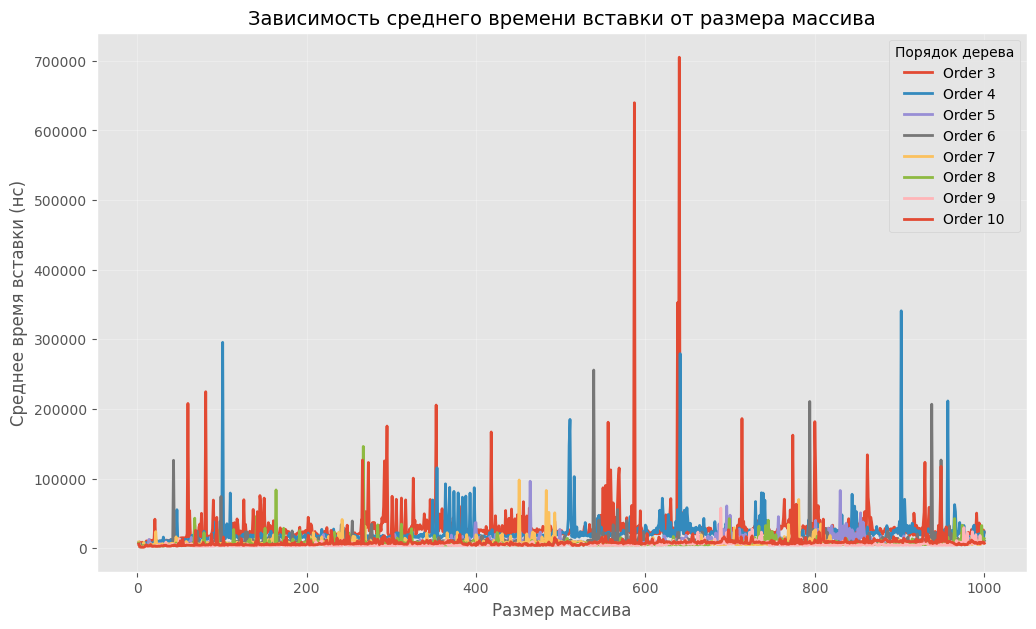

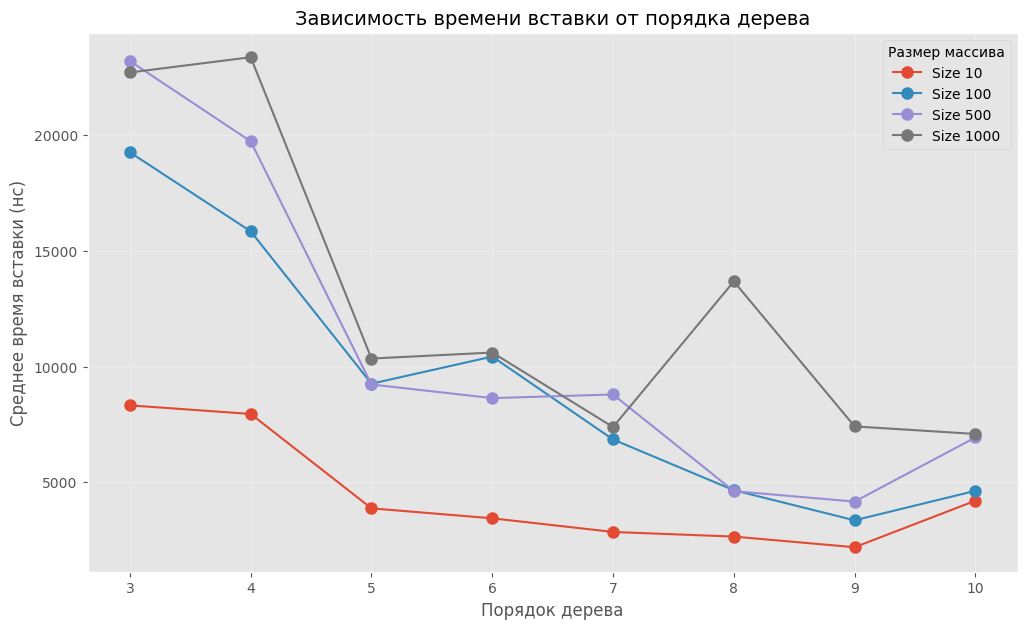

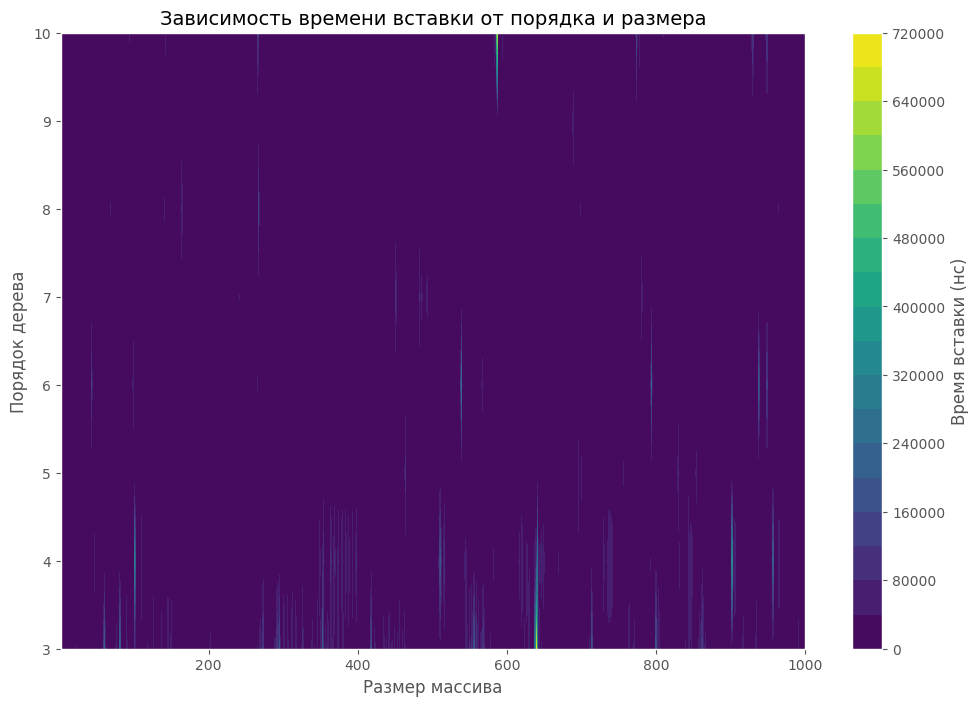

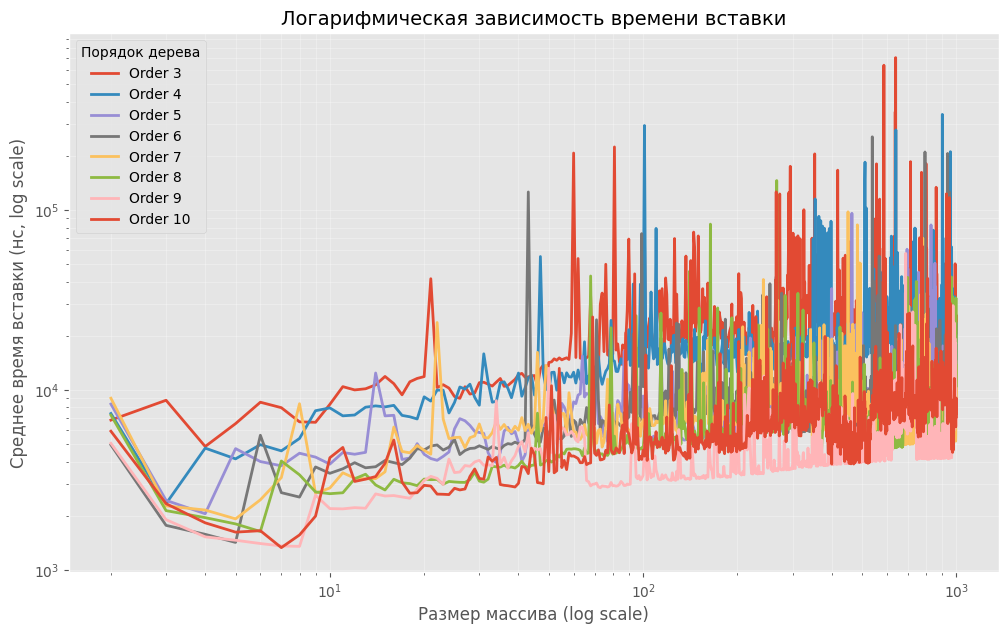

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из файла
try:
    df = pd.read_csv('res.txt', sep='\t')
    print("Данные успешно загружены:")
    print(df.head())
except FileNotFoundError:
    print("Файл не найден, проверьте путь")
    raise

# Настройка стиля графиков
plt.style.use('ggplot')

# 1. График зависимости времени вставки от размера массива для разных порядков
plt.figure(figsize=(12, 7))
for order in sorted(df['order'].unique()):
    subset = df[df['order'] == order]
    plt.plot(subset['array_size'], subset['average_insert_time_ns'], 
             label=f'Order {order}', linewidth=2)

plt.title('Зависимость среднего времени вставки от размера массива', fontsize=14)
plt.xlabel('Размер массива', fontsize=12)
plt.ylabel('Среднее время вставки (нс)', fontsize=12)
plt.legend(title='Порядок дерева')
plt.grid(True, alpha=0.3)
plt.savefig('plot_no_background.png', 
           bbox_inches='tight', 
           pad_inches=0, 
           transparent=True,
           dpi=300)
plt.show()

# 2. График зависимости времени вставки от порядка дерева для разных размеров массивов
plt.figure(figsize=(12, 7))
sample_sizes = [10, 100, 500, 1000]  # Выбираем несколько размеров для наглядности

for size in sample_sizes:
    subset = df[df['array_size'] == size]
    if not subset.empty:
        plt.plot(subset['order'], subset['average_insert_time_ns'], 
                 'o-', label=f'Size {size}', markersize=8)

plt.title('Зависимость времени вставки от порядка дерева', fontsize=14)
plt.xlabel('Порядок дерева', fontsize=12)
plt.ylabel('Среднее время вставки (нс)', fontsize=12)
plt.legend(title='Размер массива')
plt.grid(True, alpha=0.3)
plt.xticks(sorted(df['order'].unique()))
plt.show()

# 3. Тепловая карта (заменяем на contour plot)
plt.figure(figsize=(12, 8))
X = df['array_size'].unique()
Y = df['order'].unique()
Z = df.pivot(index='array_size', columns='order', values='average_insert_time_ns').values

plt.contourf(X, Y, Z.T, levels=20, cmap='viridis')
plt.colorbar(label='Время вставки (нс)')
plt.title('Зависимость времени вставки от порядка и размера', fontsize=14)
plt.xlabel('Размер массива', fontsize=12)
plt.ylabel('Порядок дерева', fontsize=12)
plt.show()

# 4. Логарифмический график
plt.figure(figsize=(12, 7))
for order in sorted(df['order'].unique()):
    subset = df[df['order'] == order]
    plt.loglog(subset['array_size'], subset['average_insert_time_ns'], 
               label=f'Order {order}', linewidth=2)

plt.title('Логарифмическая зависимость времени вставки', fontsize=14)
plt.xlabel('Размер массива (log scale)', fontsize=12)
plt.ylabel('Среднее время вставки (нс, log scale)', fontsize=12)
plt.legend(title='Порядок дерева')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()
